# SWMAL Exercise

## Learning Curves

### The Generalization Error, Over- and Underfitting, Early Stopping, and Optimal Capacity

In this exercise, we need to explain all important overall concepts in training. Let's begin with Figure 5.3 from Deep Learning (Ian Goodfellow, et. al. [DL]), which pretty much sums it all up

<img src="https://itundervisning.ase.au.dk/SWMAL/L08/Figs/dl_generalization_error.png" alt="WARNING: could not get image from server." style="height:500px">


### Qa) The Generalization Error

Write a detailed description of figure 5.3 (above) for your hand-in.
 
All concepts in the figure must be explained 

* training/generalization error, 
* underfit/overfit zone, 
* optimal capacity, 
* generalization gab, 
* and the two axes: x/capacity, y/error.

In [ ]:
# TODO: ...in text
assert False, "TODO: write some text.."

### Qb Learning Curves

Next, produce a loss vs epoch graph ala (from `04_training_linear_models.ipynb` [GITHOML]) 

<img src="https://itundervisning.ase.au.dk/SWMAL/L08/Figs/training_curve.png" alt="WARNING: could not get image from server.">


for your linear regressor, `MyLinReg`, from an earlier lesson. You need a function 

>```LossHistory()```

on your regressor class, that accumulates the internally calculated $J$'s. Once `LossHistory` is ready, plot it using the code below.

In [1]:
import numpy as np

class MyLinReg():
    def __init__(self, eta0=0.01, max_iter=100, tol=1e-3, n_iter_no_change=5, verbose=True):
        self.eta0 = eta0
        self.max_iter = max_iter
        self.tol = tol
        self.n_iter_no_change = n_iter_no_change
        self.verbose = verbose
        self.loss_history = []
        self.theta = None

    def __str__(self):
        return "MyLinReg.__str__(): custom linear regressor"

    def fit(self, X, y):
        m, n = X.shape
        X_b = np.c_[np.ones((m, 1)), X]  # add bias
        self.theta = np.random.randn(n + 1, 1)  # random init
        prev_loss = float('inf')
        no_change_count = 0

        for epoch in range(self.max_iter):
            gradients = 2/m * X_b.T.dot(X_b.dot(self.theta) - y)
            self.theta -= self.eta0 * gradients
            loss = np.mean((X_b.dot(self.theta) - y) ** 2)
            self.loss_history.append(loss)

            if self.verbose:
                print(f"Epoch {epoch+1}: loss={loss:.4f}")
            
            if abs(prev_loss - loss) < self.tol:
                no_change_count += 1
                if no_change_count >= self.n_iter_no_change:
                    if self.verbose:
                        print("Early stopping.")
                    break
            else:
                no_change_count = 0
            prev_loss = loss

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)

    def LossHistory(self):
        return self.loss_history


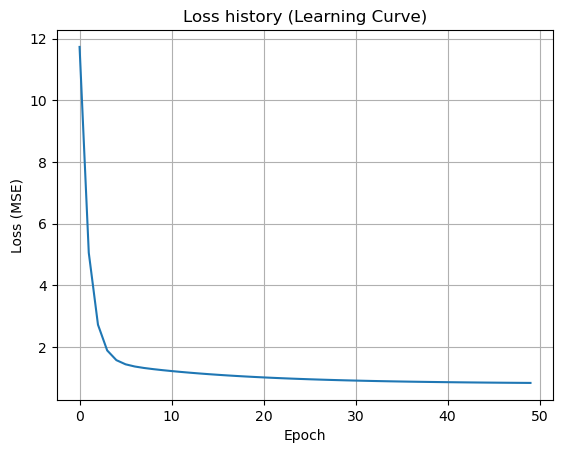

In [2]:
# Generér data
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

# Træn modellen
r = MyLinReg(eta0=0.1, max_iter=50, verbose=False)
r.fit(X, y)

# Plot loss historik
import matplotlib.pyplot as plt

losses = r.LossHistory()
plt.plot(losses)
plt.title("Loss history (Learning Curve)")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.grid(True)
plt.show()


### Qc)  Early Stopping

Then implement ___early stopping___, in your `MyLinReg` estimator. Below is a graphical view of early stopping similar to Figure 4-20 p.162 [HOML] (for a non-linear model?)

<img src="https://itundervisning.ase.au.dk/SWMAL/L08/Figs/early_stopping.png" alt="WARNING: could not get image from server.">

Write an explanation of the early stopping concept in text, implement it in your linear regressor and write some test/demo code, that via some learning-curve graphs demonstrates how it works when training your linear regressor in both _batch-gradient descent_ and 
_stochastic gradient descent_ modes.

In [3]:
# Generér data
import numpy as np
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

# Træn modellen med early stopping slået til
r = MyLinReg(
    eta0=0.1,
    max_iter=100,
    tol=1e-3,
    n_iter_no_change=5,
    verbose=True  # Vigtigt: så du kan se output i konsollen
)

r.fit(X, y)


Epoch 1: loss=11.7320
Epoch 2: loss=5.0552
Epoch 3: loss=2.7223
Epoch 4: loss=1.8883
Epoch 5: loss=1.5728
Epoch 6: loss=1.4378
Epoch 7: loss=1.3668
Epoch 8: loss=1.3195
Epoch 9: loss=1.2818
Epoch 10: loss=1.2489
Epoch 11: loss=1.2190
Epoch 12: loss=1.1914
Epoch 13: loss=1.1656
Epoch 14: loss=1.1416
Epoch 15: loss=1.1193
Epoch 16: loss=1.0984
Epoch 17: loss=1.0789
Epoch 18: loss=1.0608
Epoch 19: loss=1.0438
Epoch 20: loss=1.0280
Epoch 21: loss=1.0132
Epoch 22: loss=0.9994
Epoch 23: loss=0.9865
Epoch 24: loss=0.9745
Epoch 25: loss=0.9633
Epoch 26: loss=0.9529
Epoch 27: loss=0.9431
Epoch 28: loss=0.9340
Epoch 29: loss=0.9255
Epoch 30: loss=0.9176
Epoch 31: loss=0.9102
Epoch 32: loss=0.9032
Epoch 33: loss=0.8968
Epoch 34: loss=0.8908
Epoch 35: loss=0.8852
Epoch 36: loss=0.8799
Epoch 37: loss=0.8750
Epoch 38: loss=0.8704
Epoch 39: loss=0.8662
Epoch 40: loss=0.8622
Epoch 41: loss=0.8585
Epoch 42: loss=0.8550
Epoch 43: loss=0.8518
Epoch 44: loss=0.8488
Epoch 45: loss=0.8460
Epoch 46: loss=0.8

### Qd:  [OPTIONAL]  Using a Polynomial Regressor to Produce an Error-vs-Capacity Graph

Finally, create a polynomial estimator based on your `MyLinReg`, see details of
how to expend a linear regressor to a polynomial fitting in [HOLM] or in

> https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html
 
that contains most of the code you will need. 
 
With a polynomial regressor, you should be able to reproduce a graph similar to Figure 5.3 from Deep Learning [DL], where you notice that the _x-axis_ is capacity and not _epoch_ as the learning curves you just produced in Qb/c.

In [ ]:
assert False "TODO: implement a polynomial-fit pipeline, and create an Error-vs-Capacity plot..

pipeline = Pipeline([
      ("polynomial_features", polynomial_features),
      ("linear_regression",   MyLinReg())
  ])


### Qe Conclusion

Sum it all up in a nice, well-written conclusion.

REVISIONS||
:-|:-
2018-12-19| CEF, initial.                  
2018-02-14| CEF, major update and put in sync with under/overfitting exe.         
2018-02-20| CEF, fixed revision table malformatting.
2018-02-25| CEF, minor text updates, and made Qc optional.
2018-02-25| CEF, updated code, made more functions.
2018-03-11| CEF, corrected RSME to RMSE.
2019-10-08| CEF, updated to ITMAL E19.
2020-03-14| CEF, updated to ITMAL F20.
2020-10-15| CEF, updated to ITMAL E20.
2020-11-17| CEF, added a comment on 90-degree polynomial, made early stopping a pseudo code exe.
2021-03-22| CEF, changed crossref from "capacity_under_overfitting.ipynb Qc" to Qa+b in QdExplain the Polynomial RMSE-Capacity Plot. 
2021-03-23| CEF, changed 'cv RMSE' legend to 'validation RMSE'.
2021-10-31| CEF, updated to ITMAL E21.
2022-03-25| CEF, updated to SWMAL F22.
2023-03-16| CEF, minor update to SWMAL F23.
2024-09-25| CEF, major update, combined  generalization_error.ipynb and capacity_under_overfitting.ipynb, removed review parts, added graphs plots for MyLinReg.
2024-10-14| CEF, minor text updates.